In [2]:
import pandas as pd  
import seaborn as sns  
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn.datasets
from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor
from sklearn import metrics

# Importing the Daka House Price Dataset 

In [67]:
dhaka_housing_dataset = pd.read_csv(r"C:\Users\Moynuddin\OneDrive\Desktop\Jupyter Projects\dhaka_housing_data_with_price.csv")
dhaka_housing_dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,7.497057,18.513293,7.851171,0,0.486520,6.595796,54.281045,3.417041,20,128.227668,21.262532,287.993105,26.043037,42963.550076
1,19.014779,54.190095,7.409364,0,1.002640,6.082247,9.860723,1.660919,4,166.337930,10.115413,318.278003,2.200676,36504.391112
2,14.642559,87.294584,27.187637,0,1.197238,4.729107,27.121563,7.379571,2,104.751722,18.586455,303.795000,29.228308,32724.698573
3,11.977183,73.222489,7.486386,1,0.230026,3.038786,51.740164,0.644554,5,207.060231,18.157699,241.150216,36.313279,30676.429682
4,3.128813,80.656115,8.158492,0,1.097366,5.977435,34.472352,1.729109,1,148.293006,12.278905,216.369559,32.027630,41462.621133
5,3.128330,65.878337,22.781948,1,0.822631,4.713756,22.267542,12.210575,5,797.061657,23.522836,212.787973,23.769498,34504.642902
6,1.171091,69.227656,13.492195,1,1.173383,7.407650,52.892620,11.686364,6,302.166979,24.041944,292.014639,27.180837,42216.789102
7,17.324861,84.919565,23.301317,0,0.665010,3.143678,35.666930,13.769513,2,204.487609,24.417864,248.438306,39.617480,31991.791712
8,12.026289,24.966801,1.960985,0,1.047388,6.508967,29.520226,12.890474,1,268.697381,24.569419,354.739674,4.535821,48652.285388
9,14.164371,48.942496,14.627136,1,0.262394,8.648845,49.078615,10.406046,4,755.287900,10.001057,362.410595,27.022548,55571.583830


In [62]:
dhaka_housing_dataset.shape

(1000, 14)

In [61]:
dhaka_housing_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [60]:
dhaka_housing_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9.810229,50.701731,15.072172,0.491000,0.685129,5.991972,52.259751,7.581601,12.330000,440.484025,19.874063,254.433940,20.502125,40382.167644
std,5.839826,29.218989,8.720226,0.500169,0.286316,1.725107,27.614887,4.155885,7.040644,196.111913,5.722775,85.786729,11.494879,9850.149235
min,0.102594,0.321826,0.000349,0.000000,0.200031,3.001362,5.372246,0.503495,1.000000,100.287203,10.001057,100.642276,1.006152,17502.672998
25%,4.727106,24.107427,7.840529,0.000000,0.433795,4.539200,28.120811,3.988299,6.000000,276.552566,14.961478,182.127282,10.531766,32835.967604
50%,9.941179,51.873391,15.018418,0.000000,0.677095,5.902075,52.480405,7.435360,12.000000,433.681016,19.914936,256.546153,19.802646,40315.524592
75%,14.888949,76.046506,22.773106,1.000000,0.929260,7.501288,76.077165,11.228452,19.000000,601.777389,24.738391,329.139004,30.787383,47930.127258
max,19.994356,99.941373,29.934626,1.000000,1.199558,8.992758,99.948765,14.988506,24.000000,797.893352,29.990104,399.901962,39.974070,62543.546370


In [24]:
dataset_correlation = dhaka_housing_dataset.corr()

<Axes: >

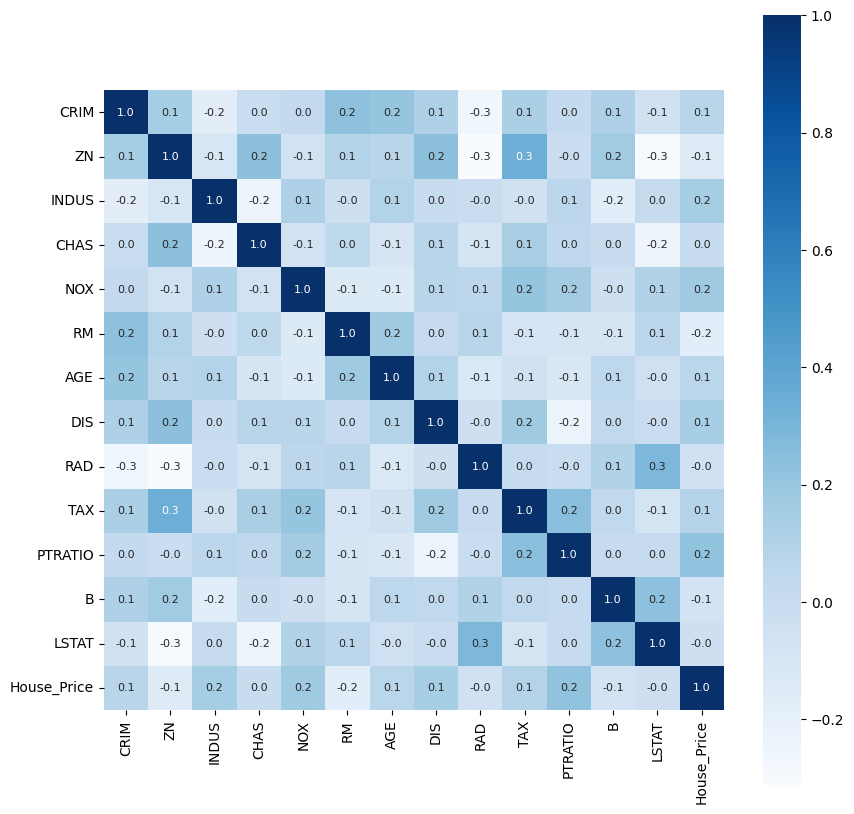

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset_correlation,cbar=True,square=True ,fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')


In [59]:
x= dhaka_housing_dataset.iloc[:,:-1]
y= dhaka_housing_dataset['PRICE']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [34]:
print(x.shape,x_train.shape,x_test.shape)

(50, 13) (40, 13) (10, 13)


In [36]:
model = XGBRegressor()
model.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
train_prediction = model.predict(x_train)
#print(train_prediction)

In [41]:
#Squred error
train_score_1 = metrics.r2_score(y_train,train_prediction)

#Mean Absolute Error
train_score_2 = metrics.mean_absolute_error(y_train, train_prediction)


In [64]:
print(train_score_1)
print(train_score_2)

0.9999999981252741
0.0003663730621340733


In [45]:
test_prediction = model.predict(x_test)
#print(test_prediction)

In [65]:
#Square Root Error
test_score_1 = metrics.r2_score(y_test,test_prediction)

#Mean Absolute Error
test_score_2 = metrics.mean_absolute_error(y_test,test_prediction)

In [66]:
print(test_score_1)
print(test_score_2)

-0.7837879364883018
10.0422119140625


Text(0.5, 1.0, 'Actual vs Predicted price')

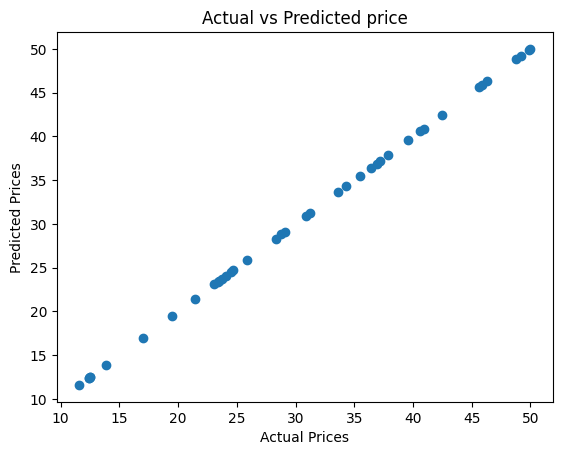

In [53]:
plt.scatter(y_train, train_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted price")

Text(0.5, 1.0, 'Actual vs Predicted price')

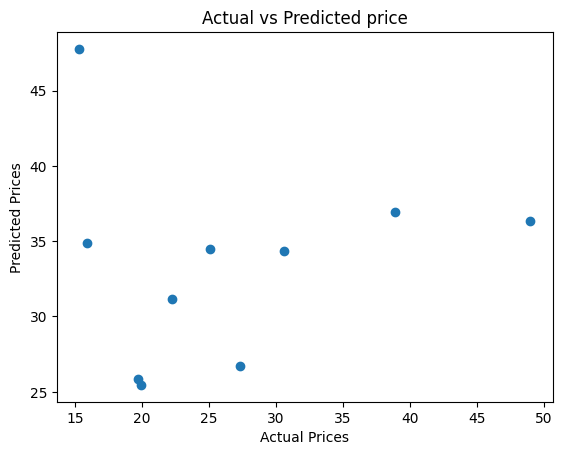

In [57]:
plt.scatter(y_test,test_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted price")